In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series

In [142]:
data = pd.read_csv('sales_transactions.csv')

In [143]:
data.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Columns: 107 entries, Product_Code to Normalized 51
dtypes: float64(52), int64(54), object(1)
memory usage: 678.0+ KB


In [145]:
data.shape

(811, 107)

In [146]:
data.columns = map(str.upper, data.columns)

In [147]:
from sklearn.preprocessing import LabelEncoder
encode = [ 'PRODUCT_CODE']

for x in encode:
    label = LabelEncoder()
    data[x] = label.fit_transform(data[x])

In [148]:
from sklearn.cross_validation import train_test_split
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [149]:
col_names = list(data.columns.values)


In [150]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_s = scaler.fit_transform(data)

In [151]:
# Split Data

In [152]:
train, test = train_test_split(data_s, test_size = 0.3, random_state = 99)

In [153]:
clusters = range(1,11)
mean_dist = []

In [154]:
import numpy as np
from scipy.spatial.distance import cdist
for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(train)
    mean_dist.append(sum(np.min(cdist(train, model.cluster_centers_ ,'euclidean'),\
                               axis =1))/train.shape[0])
    

In [155]:
#### Plotting the elbow curve

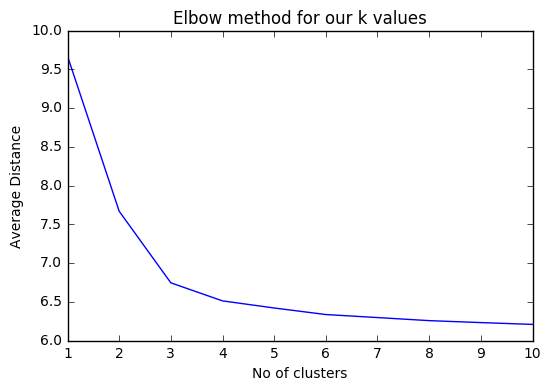

In [156]:
%matplotlib inline
plt.plot(clusters, mean_dist)
plt.xlabel('No of clusters')
plt.ylabel('Average Distance')
plt.title('Elbow method for our k values')

In [157]:
#### Canonical discriminate Analysis

In [158]:
## k = 3, 3 cluster solution

In [163]:
model1 = KMeans(n_clusters = 4)
model1.fit(train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [164]:
from sklearn.decomposition import PCA

In [165]:
pca_2 = PCA(2)

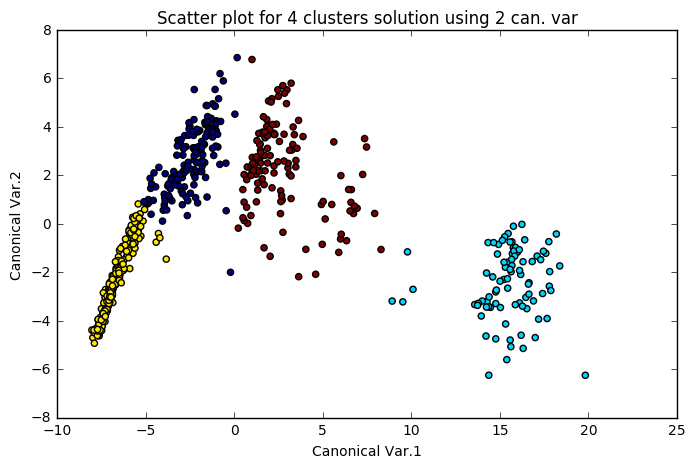

In [171]:
plt.figure(figsize = (8,5))
plot_columns = pca_2.fit_transform(train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model1.labels_,)
plt.xlabel('Canonical Var.1')
plt.ylabel('Canonical Var.2')
plt.title('Scatter plot for 4 clusters solution using 2 can. var')
plt.show()

In [168]:
model2 = KMeans(n_clusters = 3)
model2.fit(train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

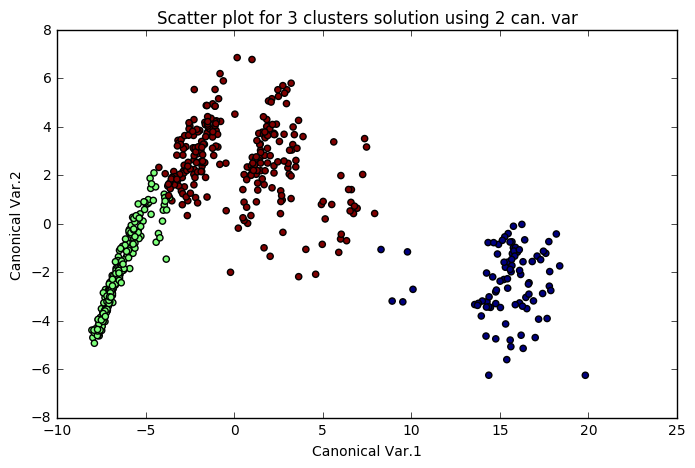

In [172]:
plt.figure(figsize = (8,5))
plot_columns = pca_2.fit_transform(train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model2.labels_,)
plt.xlabel('Canonical Var.1')
plt.ylabel('Canonical Var.2')
plt.title('Scatter plot for 3 clusters solution using 2 can. var')
plt.show()